In [1]:
using Distributions
using Random
using SpecialFunctions
using StatsPlots
default(fmt=:png, titlefontsize=10, size=(400, 250))

In [2]:
function plot_unbiased_std(; dist = Normal(4, 3), n = 10, L = 10^6, kwargs...)
    @show dist
    @show n
    @show σ = std(dist)
    tmp = zeros(n)
    stds = [std(rand!(dist, tmp)) for _ in 1:L]
    a = √((n-1)/2) * exp(loggamma((n-1)/2) - loggamma(n/2))
    unbiased_stds = a * stds
    E_unbiased_stds = mean(unbiased_stds)
    @show E_unbiased_stds
    @show std(unbiased_stds)

    stephist(unbiased_stds; norm=true, label="\"unbiased\" std")
    vline!([E_unbiased_stds]; label="E[\"unbiased\" std]", c=:blue)
    vline!([σ]; label="std(dist)", c=:red, ls=:dash)
    plot!(; kwargs...)
end

plot_unbiased_std (generic function with 1 method)

dist = Normal{Float64}(μ=4.0, σ=3.0)
n = 10
σ = std(dist) = 3.0
E_unbiased_stds = 3.000983054597636
std(unbiased_stds) = 0.7159254830401595


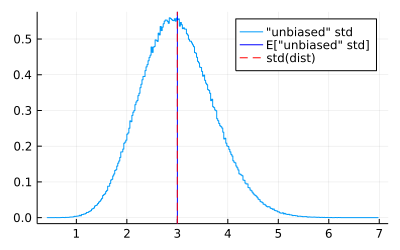

In [3]:
plot_unbiased_std(dist=Normal(4, 3))

dist = Exponential{Float64}(θ=3.0)
n = 10
σ = std(dist) = 3.0
E_unbiased_stds = 2.848682618437831
std(unbiased_stds) = 1.1814870661649604


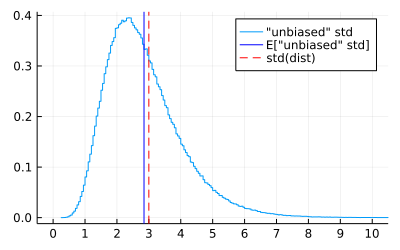

In [4]:
plot_unbiased_std(dist=Exponential(3), xtick=0:100, xlim=(-0.5, 10.5))

dist = LogNormal{Float64}(μ=0.0, σ=1.124507376115164)
n = 10
σ = std(dist) = 3.0000000000000004
E_unbiased_stds = 2.2940898773728113
std(unbiased_stds) = 2.076954195600326


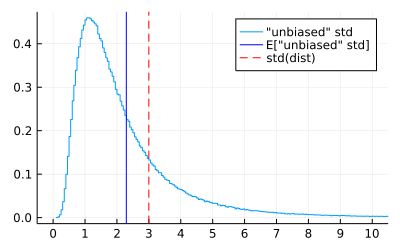

In [5]:
a = √(log((1+√(1+4*3^2))/2))
plot_unbiased_std(dist=LogNormal(0, a), xtick=0:100, xlim=(-0.5, 10.5))

dist = LogNormal{Float64}(μ=0.0, σ=1.124507376115164)
n = 30
σ = std(dist) = 3.0000000000000004
E_unbiased_stds = 2.560508552493906
std(unbiased_stds) = 1.6169513538758316


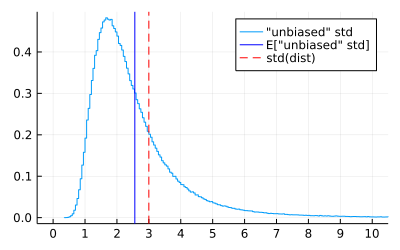

In [6]:
plot_unbiased_std(dist=LogNormal(0, a), n=30, xtick=0:100, xlim=(-0.5, 10.5))

dist = LogNormal{Float64}(μ=0.0, σ=1.124507376115164)
n = 100
σ = std(dist) = 3.0000000000000004
E_unbiased_stds = 2.769360210869547
std(unbiased_stds) = 1.1676889568809308


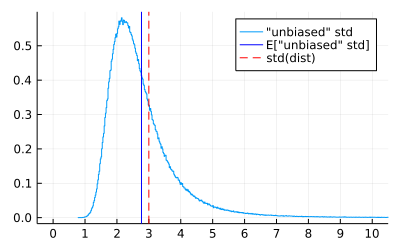

In [7]:
plot_unbiased_std(dist=LogNormal(0, a), n=100, xtick=0:100, xlim=(-0.5, 10.5))

dist = LogNormal{Float64}(μ=0.0, σ=1.124507376115164)
n = 1000
σ = std(dist) = 3.0000000000000004
E_unbiased_stds = 2.9495642483881612
std(unbiased_stds) = 0.5531479750255032


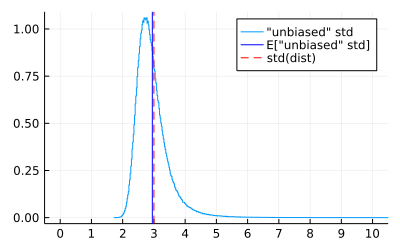

In [8]:
plot_unbiased_std(dist=LogNormal(0, a), n=1000, xtick=0:100, xlim=(-0.5, 10.5))